

# Femhack challenge

# EDA

In [419]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import datasets
from io import StringIO
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
from pandas.plotting import scatter_matrix
%matplotlib inline

In [420]:
# Crear dataframe a partir de .csv
df = pd.read_csv('data_individual_challenge.csv',delimiter=';',dtype={'Open': np.float64,'High':np.float64,'Low':np.float64,'Close':np.float64,'rsi':np.float64,'ema_fast':np.float64,'ema_slow':np.float64})

# Mostrar número de filas y columnas del dataframe
print("Filas: " + str(df.shape[0]) + " Cols: " + str(df.shape[1]))

# Mostrar las primeras 10 filas (TO-DO)
df.head(10)

Filas: 1035 Cols: 9


,Date,Open,High,Low,Close,rsi,ema_fast,ema_slow,volatility
0,2000-01-03,0.6281,633.00000,0.6235,0.6272,NaN,NaN,NaN,NaN
1,2000-01-10,0.6271,629.00000,0.6181,0.6197,NaN,NaN,NaN,NaN
2,2000-01-17,0.6200,0.62250,0.6072,609.0000,NaN,NaN,NaN,NaN
3,2000-01-24,0.6091,0.61271,599.0000,0.6027,NaN,NaN,NaN,NaN
4,2000-01-31,0.6021,0.62670,598.0000,0.6158,NaN,NaN,NaN,NaN
5,2000-02-07,0.6166,0.62090,0.6102,0.6192,NaN,NaN,NaN,NaN
6,2000-02-14,0.6192,0.62320,0.6117,0.6157,NaN,NaN,NaN,NaN
7,2000-02-21,0.6161,0.62650,0.6100,0.6114,NaN,NaN,NaN,NaN
8,2000-02-28,0.6117,0.61740,0.5929,606.0000,NaN,NaN,NaN,NaN
9,2000-03-06,0.6059,0.61320,602.0000,0.6102,NaN,NaN,NaN,NaN


In [421]:
#eliminamos primeras filas ya que no hay valores de ema_slow
df=df[42:].reset_index(drop=True)
df.head()

,Date,Open,High,Low,Close,rsi,ema_fast,ema_slow,volatility
0,2000-10-23,0.5786,0.5876,0.5731,0.5784,30.343134,0.599133,0.608889,2.598570
1,2000-10-30,0.5783,0.6044,0.5771,598.0000,45.262621,0.598982,0.608382,2.659958
2,2000-11-06,0.5982,0.6079,594.0000,604.0000,48.872746,0.599651,0.608179,2.609805
3,2000-11-13,0.6042,0.6052,0.5941,0.5966,44.936330,0.599244,0.607640,2.586345
4,2000-11-20,0.5967,0.6024,593.0000,0.5989,46.381859,0.599198,0.607234,2.504494


In [422]:
# Hallar número de valores únicos en cada columna (TO-DO)
df.astype('object').describe(include='all').loc['unique', :]

Date            993
Open          893.0
High          896.0
Low           888.0
Close         871.0
rsi           992.0
ema_fast      993.0
ema_slow      993.0
volatility    993.0
Name: unique, dtype: object

In [423]:
# Comprobar la existencia de valores nulos en el dataset
df.isnull().sum()

Date          0
Open          0
High          0
Low           0
Close         0
rsi           0
ema_fast      0
ema_slow      0
volatility    0
dtype: int64

In [424]:
# Mostrar información general del dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 993 entries, 0 to 992
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        993 non-null    object 
 1   Open        993 non-null    float64
 2   High        993 non-null    float64
 3   Low         993 non-null    float64
 4   Close       993 non-null    float64
 5   rsi         993 non-null    float64
 6   ema_fast    993 non-null    float64
 7   ema_slow    993 non-null    float64
 8   volatility  993 non-null    float64
dtypes: float64(8), object(1)
memory usage: 69.9+ KB


In [425]:
# Descripción analítica básica del dataframe
df.describe()

,Open,High,Low,Close,rsi,ema_fast,ema_slow,volatility
count,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000
mean,55.233098,61.658290,76.522339,59.981005,51.453669,0.771572,0.767737,2.141422
std,194.748718,209.418721,228.294309,206.060266,10.262641,0.094958,0.093338,1.498486
min,0.578300,0.587600,0.006600,0.578400,19.171099,0.598982,0.607234,1.006340
25%,0.686700,0.692700,0.682500,0.686800,44.518020,0.682514,0.682348,1.453910
50%,0.809300,0.810110,0.808200,0.806800,50.791701,0.791212,0.784763,1.808746
75%,0.875870,0.882530,0.870600,0.875100,57.852760,0.860667,0.856127,2.209263
max,892.000000,934.000000,899.000000,921.000000,79.522395,0.903959,0.889572,17.421381


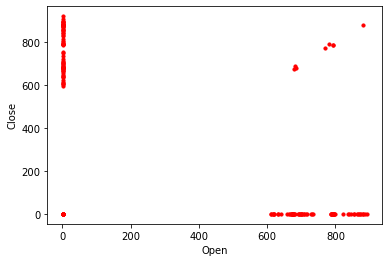

In [426]:
# Scatterplot de open y close para
df.plot.scatter(x='Open', y='Close', s=10, c='red');

#parece que no hay correlacion entre las variables

## Buscamos correlaciones entre las variables


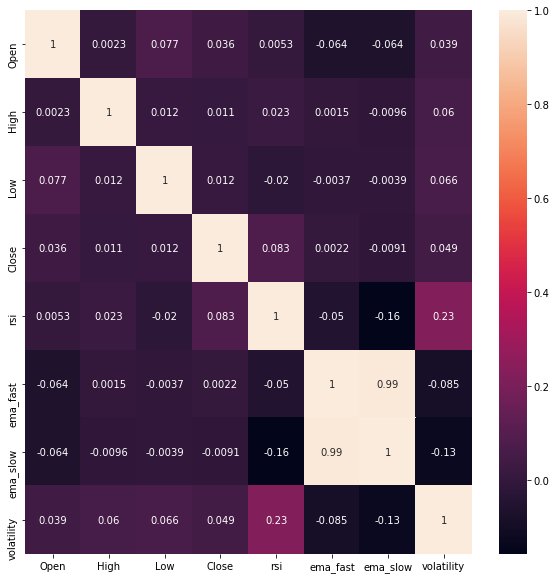

In [427]:
# Se muestra la matriz de correlacion entre variables
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(),annot=True);

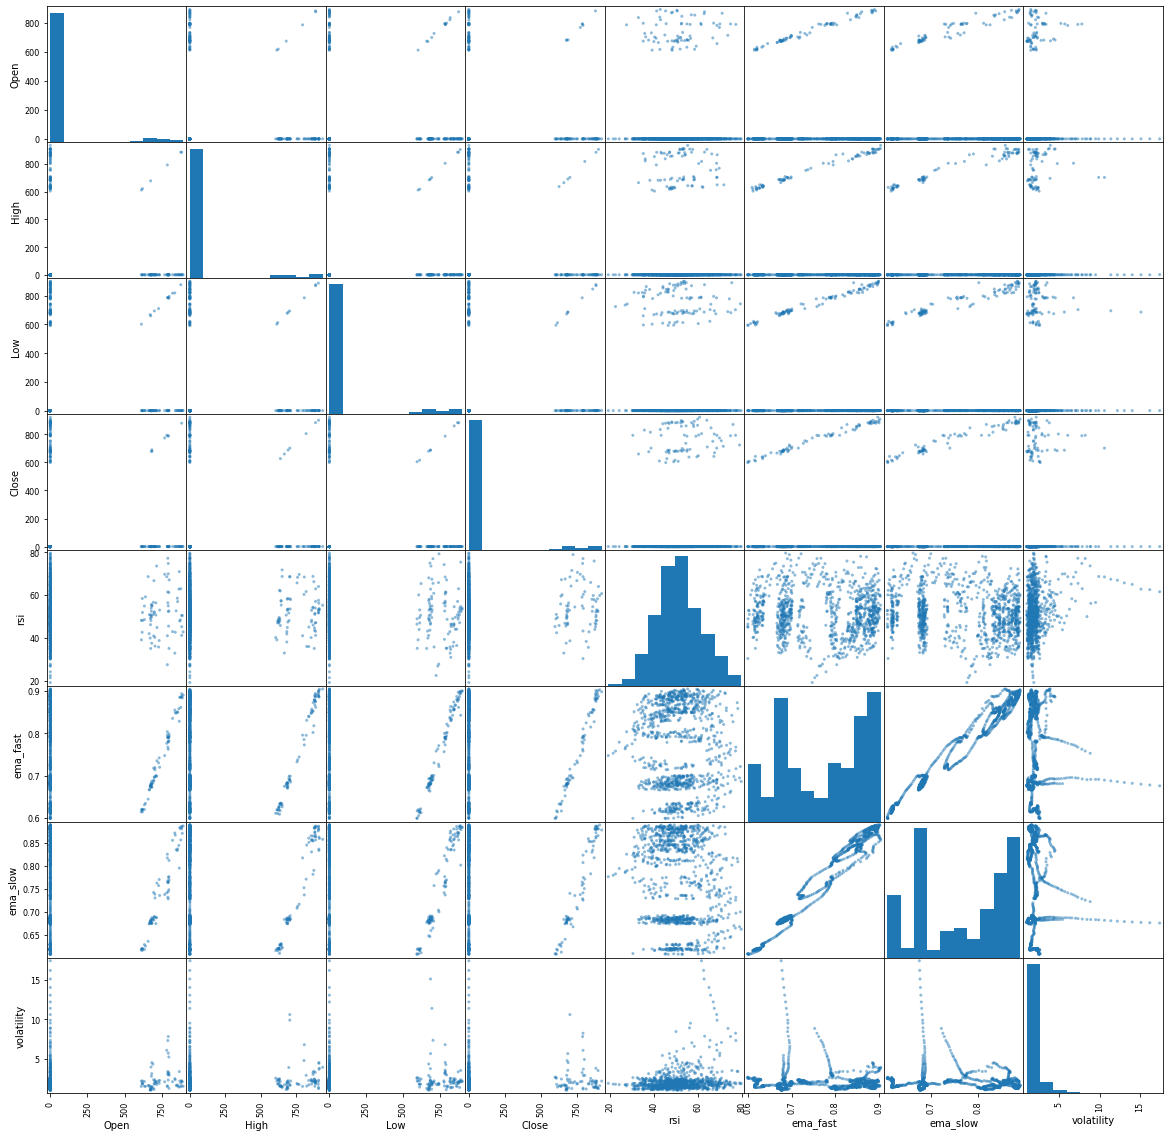

In [428]:
# Mostrar correlaciones como una función discreta entre las diferentes variables con una matriz

scatter_matrix(df, figsize=(20, 20));

In [429]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'rsi', 'ema_fast', 'ema_slow',
       'volatility'],
      dtype='object')

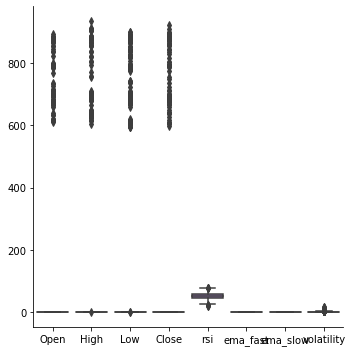

In [430]:
sns.catplot(data=df, kind = 'box')

In [431]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'rsi', 'ema_fast', 'ema_slow',
       'volatility'],
      dtype='object')

Text(0.5, 0, 'Semana')

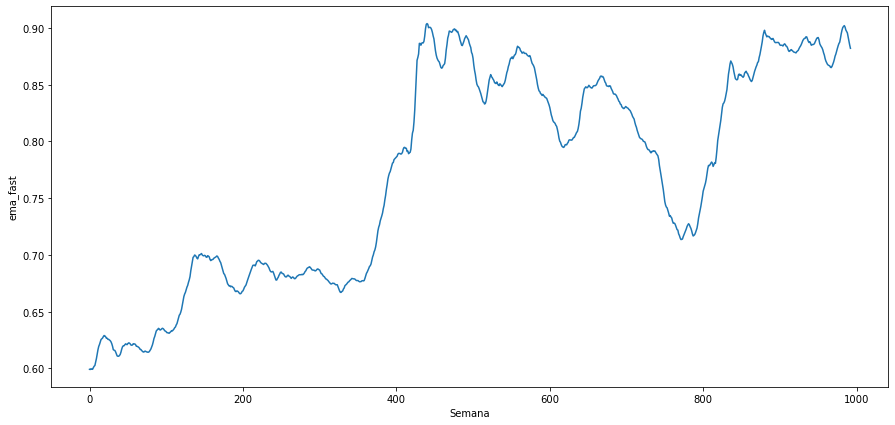

In [432]:

plt.figure(figsize=(15, 7))

df['ema_fast'].plot()
plt.ylabel('ema_fast')
plt.xlabel('Semana')



Text(0.5, 0, 'Semana')

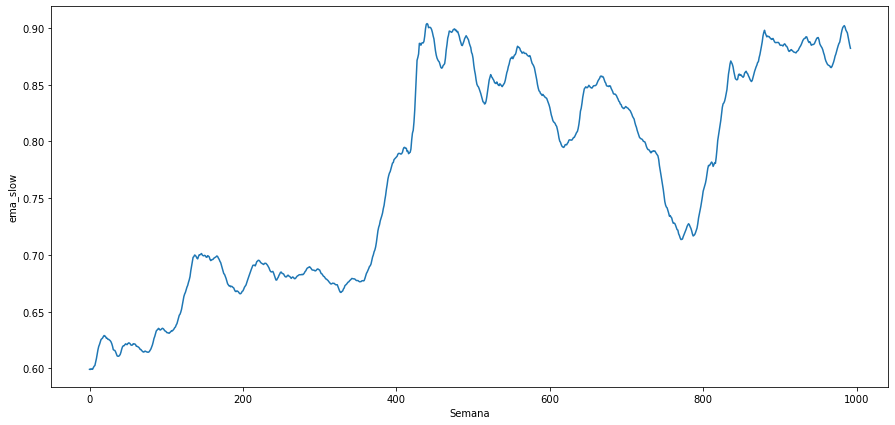

In [433]:

plt.figure(figsize=(15, 7))

df['ema_fast'].plot()
plt.ylabel('ema_slow')
plt.xlabel('Semana')



<AxesSubplot:xlabel='rsi', ylabel='Count'>

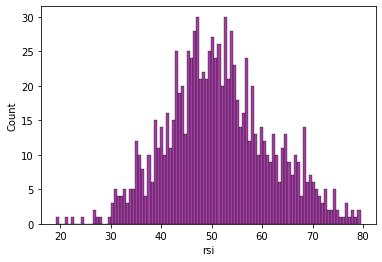

In [434]:
sns.histplot(df['rsi'].dropna(), bins=100, color='purple')

In [435]:
#Creamos variable uptrend restando ema_fast y ema_slow
df['uptrend']=df['ema_fast']-df['ema_slow']

## Outlier detection

In [436]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'rsi', 'ema_fast', 'ema_slow',
       'volatility', 'uptrend'],
      dtype='object')

In [437]:
#hay valores extremadamente bajos, hacemos outlier detection
# For each feature find the data points with extreme high or low values


for feature in df.keys()[1:5]:
    
    # Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(df[feature], q=25)
    # Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(df[feature], q=75)
    # Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    interquartile_range = Q3 - Q1
    step = 1.5 * interquartile_range
    
    # Display the outliers
    print("Data points considered outliers for the feature '{}':".format(feature))
    display(df[~((df[feature] >= Q1 - step) & (df[feature] <= Q3 + step))])
    aux = ~((df[feature] >= Q1 - step) & (df[feature] <= Q3 + step))
    
    
    # Select the indices for data points you wish to remove
    outliers  = [aux[aux ==True].index]
    # Remove the outliers, if any were specified
    good_data = df.drop(df.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'Open':


,Date,Open,High,Low,Close,rsi,ema_fast,ema_slow,volatility,uptrend
30,2001-05-21,612.0,612.00000,601.00000,0.60470,39.059358,0.619465,0.618994,2.162389,0.000472
41,2001-08-06,618.0,0.62840,0.61590,0.62770,58.361694,0.614335,0.615771,2.182713,-0.001436
44,2001-08-27,632.0,0.63230,0.62390,0.62540,54.836495,0.619873,0.617731,2.111317,0.002142
56,2001-11-19,619.0,0.62570,0.61750,0.62230,51.805587,0.620623,0.619287,1.878584,0.001336
61,2001-12-24,617.0,0.61860,0.60380,0.61010,42.591844,0.619486,0.619263,1.805537,0.000224
...,...,...,...,...,...,...,...,...,...,...
798,2016-02-08,768.0,0.78956,0.76611,773.00000,69.644810,0.746936,0.737565,2.074260,0.009371
816,2016-06-13,792.0,0.79935,0.77786,0.77786,52.288587,0.780700,0.764516,2.293163,0.016183
902,2018-02-05,882.0,0.89081,0.87347,0.88560,50.486666,0.884868,0.881117,1.536070,0.003750
909,2018-03-26,873.0,0.88180,0.87170,0.88180,48.349888,0.883856,0.881854,1.437214,0.002002


Data points considered outliers for the feature 'High':


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexes\base.py:4307: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


,Date,Open,High,Low,Close,rsi,ema_fast,ema_slow,volatility,uptrend
9,2000-12-25,0.62460,631.0,0.62000,0.62940,62.145039,0.608654,0.609226,2.448042,-0.000572
22,2001-03-26,0.62280,626.0,0.61270,0.61820,46.912908,0.626557,0.619676,2.335674,0.006881
24,2001-04-09,0.62690,628.0,0.61470,0.61880,47.502505,0.625551,0.619951,2.353068,0.005600
27,2001-04-30,0.62120,625.0,0.61830,0.62070,48.684526,0.624385,0.620271,2.208128,0.004113
30,2001-05-21,612.00000,612.0,601.00000,0.60470,39.059358,0.619465,0.618994,2.162389,0.000472
...,...,...,...,...,...,...,...,...,...,...
648,2013-03-25,0.85409,856.0,0.84160,0.84260,52.788011,0.847461,0.830581,1.781060,0.016880
885,2017-10-09,0.89747,903.0,0.88758,0.88960,51.801981,0.892497,0.876387,1.743475,0.016110
947,2018-12-17,0.89827,905.0,0.89651,0.89920,57.487807,0.889298,0.886452,1.345080,0.002846
968,2019-05-13,0.86373,879.0,0.86240,0.87303,51.377652,0.866232,0.874470,1.494945,-0.008238


Data points considered outliers for the feature 'Low':


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexes\base.py:4307: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


,Date,Open,High,Low,Close,rsi,ema_fast,ema_slow,volatility,uptrend
2,2000-11-06,0.59820,0.60790,594.0,604.00000,48.872746,0.599651,0.608179,2.609805,-0.008527
4,2000-11-20,0.59670,0.60240,593.0,0.59890,46.381859,0.599198,0.607234,2.504494,-0.008035
8,2000-12-18,0.60680,0.62630,605.0,0.62450,60.026493,0.605463,0.608242,2.521545,-0.002779
10,2001-01-01,0.62940,0.63770,621.0,0.63720,65.297897,0.612460,0.610527,2.432559,0.001933
30,2001-05-21,612.00000,612.00000,601.0,0.60470,39.059358,0.619465,0.618994,2.162389,0.000472
...,...,...,...,...,...,...,...,...,...,...
845,2017-01-02,0.85143,0.86000,845.0,859.00000,54.511665,0.854936,0.834588,2.236167,0.020348
861,2017-04-24,0.84777,0.85303,841.0,0.84339,45.461376,0.854825,0.846718,1.929384,0.008107
912,2018-04-16,0.86565,0.87892,862.0,0.87230,44.030532,0.879404,0.880428,1.468853,-0.001024
944,2018-11-26,0.88445,0.89240,881.0,0.88720,50.829299,0.885639,0.885010,1.357615,0.000629


Data points considered outliers for the feature 'Close':


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexes\base.py:4307: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


,Date,Open,High,Low,Close,rsi,ema_fast,ema_slow,volatility,uptrend
1,2000-10-30,0.57830,0.60440,0.57710,598.0,45.262621,0.598982,0.608382,2.659958,-0.009400
2,2000-11-06,0.59820,0.60790,594.00000,604.0,48.872746,0.599651,0.608179,2.609805,-0.008527
7,2000-12-11,0.60980,0.61790,0.60000,607.0,50.916767,0.602534,0.607449,2.523872,-0.004915
11,2001-01-08,0.63690,0.64480,0.62890,642.0,67.113142,0.616399,0.611991,2.418819,0.004408
66,2002-01-28,0.61340,0.61470,0.60660,609.0,42.369332,0.616707,0.618253,1.748942,-0.001546
...,...,...,...,...,...,...,...,...,...,...
921,2018-06-18,0.87330,0.88050,0.87270,876.0,46.816039,0.878111,0.879657,1.333823,-0.001546
925,2018-07-16,0.88288,0.89571,0.88168,892.0,58.218222,0.881953,0.880876,1.272952,0.001076
935,2018-09-24,0.89821,0.89830,0.88723,892.0,52.670861,0.892228,0.886371,1.291916,0.005857
977,2019-07-15,0.89653,905.00000,0.89403,899.0,63.928137,0.886380,0.880789,1.210045,0.005591


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexes\base.py:4307: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


In [438]:
#comparamos df con good_data
print('Número de filas de df eliminadas es:'+str(len(df)-len(good_data)))
print('% de filas de df eliminadas es:'+str((len(df)-len(good_data))/len(df)*100))


Número de filas de df eliminadas es:77
% de filas de df eliminadas es:7.754279959718026


In [439]:
len(good_data)

916

## Correlacion sin outliers y estandarizando

In [440]:
#Visto que no es excesivo continaumos con good_data

In [441]:
good_data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'rsi', 'ema_fast', 'ema_slow',
       'volatility', 'uptrend'],
      dtype='object')

In [442]:
X=good_data.dropna()[['Open','High','Low','Close','rsi', 'ema_fast', 'ema_slow',
       'volatility','uptrend']]


In [443]:
columns=X.columns

In [444]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_sc = sc.fit_transform(X)
df_sc=pd.DataFrame(X_sc)
df_sc.rename(columns={0:'Open',1:'High',2:'Low',3:'Close',4:'rsi', 5:'ema_fast', 6:'ema_slow',
       7:'volatility',8:'uptrend'},inplace=True)

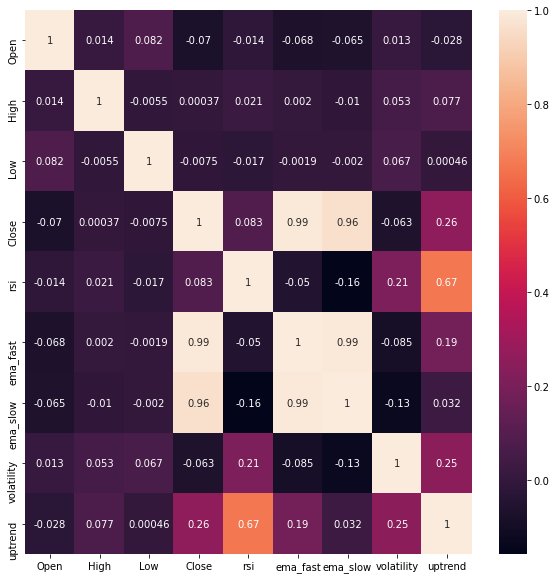

In [445]:
# Se muestra la matriz de correlacion entre variables
plt.figure(figsize=(10, 10))
sns.heatmap(df_sc.corr(),annot=True);

<AxesSubplot:>

<Figure size 720x504 with 0 Axes>

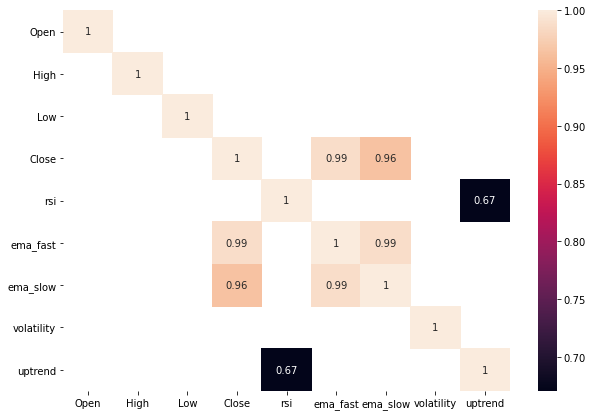

In [446]:
plt.figure(figsize=(10, 7))
correlation=df_sc.corr()
max_corr = correlation[(correlation>0.5)|(correlation<-0.5)]
plt.figure(figsize=(10, 7))
sns.heatmap(max_corr, annot=True)

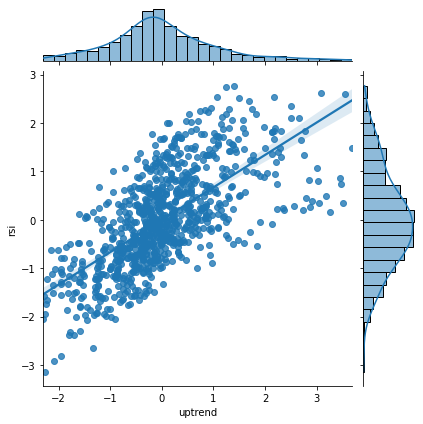

In [447]:
#como vemos uptrend y rsi están correlacionados
sns.jointplot(data=df_sc, x="uptrend", y="rsi", kind="reg")

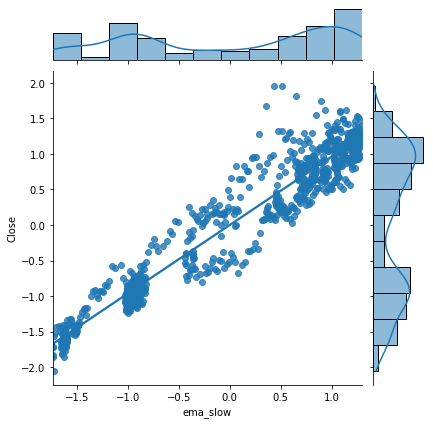

In [448]:
#como vemos uptrend y rsi están correlacionados
sns.jointplot(data=df_sc, x="ema_slow", y="Close", kind="reg")

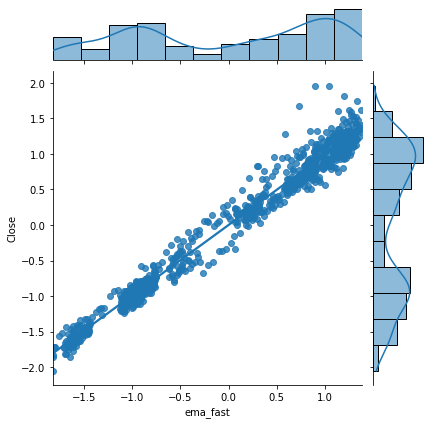

In [449]:
#como vemos uptrend y rsi están correlacionados
sns.jointplot(data=df_sc, x="ema_fast", y="Close", kind="reg")

# PCA

In [450]:
from sklearn.decomposition import PCA

pca = PCA()
X_pca = pca.fit_transform(X_sc)


In [451]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([3.34877370e-01, 2.04176473e-01, 1.21445356e-01, 1.10818657e-01,
       1.03175774e-01, 9.13876346e-02, 3.37364350e-02, 3.82299704e-04,
       1.88514610e-33])

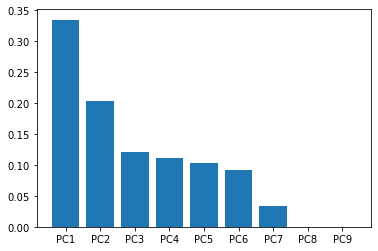

In [452]:
fig, ax = plt.subplots()
plt.bar(['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9'], explained_variance)
plt.show()

In [453]:
columns

Index(['Open', 'High', 'Low', 'Close', 'rsi', 'ema_fast', 'ema_slow',
       'volatility', 'uptrend'],
      dtype='object')

In [454]:

columns=columns
pca_values=pca.components_
pca.components_

array([[ 6.03198281e-02, -8.89116144e-04,  7.71932072e-03,
        -5.72817606e-01, -3.34133971e-03, -5.74210305e-01,
        -5.63571397e-01,  6.11650253e-02, -1.30761660e-01],
       [-1.42553898e-02,  1.00389578e-01,  1.57403548e-02,
         4.90589392e-02,  6.42489161e-01, -3.04766912e-02,
        -1.31674830e-01,  3.80125088e-01,  6.41490205e-01],
       [ 6.32635701e-01,  1.12219251e-01,  7.23216454e-01,
         2.31168382e-02, -9.77255687e-02,  4.00994227e-02,
         4.76389778e-02,  2.19704180e-01, -4.36443857e-02],
       [ 1.16907285e-02,  9.70988650e-01, -1.93789769e-01,
        -1.16440945e-02, -1.25246485e-01,  8.43348820e-03,
         1.50589531e-02,  4.08002873e-02, -4.12924659e-02],
       [-7.58534660e-01,  7.62558100e-02,  5.24138337e-01,
        -2.52113219e-02, -1.47911483e-01, -2.15183443e-03,
         1.17666213e-02,  3.36935053e-01, -8.89240910e-02],
       [ 1.42860000e-01, -1.59897600e-01, -4.05251762e-01,
         1.26760496e-02, -2.61824392e-01,  4.973793

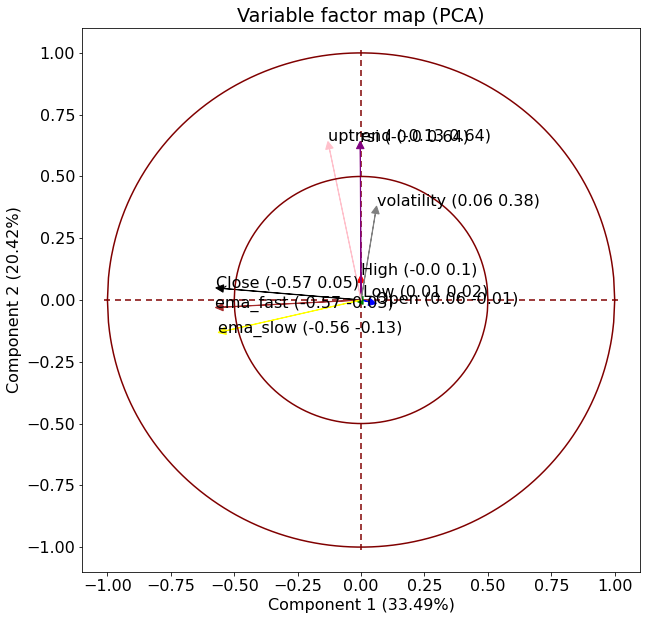

In [455]:
import matplotlib.pyplot as plt
 
plt.figure(figsize=(10,10))
plt.rcParams.update({'font.size': 16})

# Plot circle
# Create a list of 500 points with equal spacing between -1 and 1
import numpy as np
x=np.linspace(start=-1,stop=1,num=500)
#Find y1 and y2 for these points
y_positive=lambda x: np.sqrt(1-x**2) 
y_negative=lambda x: -np.sqrt(1-x**2)
plt.plot(x,list(map(y_positive, x)), color='maroon')
plt.plot(x,list(map(y_negative, x)),color='maroon')

#Plot smaller circle
x=np.linspace(start=-0.5,stop=0.5,num=500)
y_positive=lambda x: np.sqrt(0.5**2-x**2) 
y_negative=lambda x: -np.sqrt(0.5**2-x**2)
plt.plot(x,list(map(y_positive, x)), color='maroon')
plt.plot(x,list(map(y_negative, x)),color='maroon')

#Create broken lines
x=np.linspace(start=-1,stop=1,num=50)
plt.scatter(x,[0]*len(x), marker='_',color='maroon')
plt.scatter([0]*len(x), x, marker='|',color='maroon')

#Define color list
colors = ['blue', 'red', 'green', 'black', 'purple', 'brown','yellow','grey','pink']
if len(pca_values[0]) > 6:
    colors=colors*(int(len(pca_values[0])/6)+1)
    
add_string=""
for i in range(len(pca_values[0])):
    xi=pca_values[0][i]
    yi=pca_values[1][i]
    plt.arrow(0,0, 
              dx=xi, dy=yi, 
              head_width=0.03, head_length=0.03, 
              color=colors[i], length_includes_head=True)
    add_string=f" ({round(xi,2)} {round(yi,2)})"
    plt.text(pca_values[0, i], 
             pca_values[1, i], 
             s=columns[i] + add_string )

     
plt.xlabel(f"Component 1 ({round(pca.explained_variance_ratio_[0]*100,2)}%)")
plt.ylabel(f"Component 2 ({round(pca.explained_variance_ratio_[1]*100,2)}%)")
plt.title('Variable factor map (PCA)')
plt.show()

# Regresion

In [456]:
len(df_sc)

916

In [457]:
# Split the data into features and target label
X = df_sc.drop('Close', axis = 1)
y = df_sc['Close']


In [458]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42,shuffle=False)

In [459]:
from sklearn.metrics import mean_squared_error, accuracy_score, r2_score
from sklearn.metrics import max_error, median_absolute_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge

In [460]:
#Modelos
model_linear = LinearRegression()
model_linear.fit(X_train, y_train)
model_lasso = Lasso()
model_lasso.fit(X_train, y_train)
model_ridge = Ridge()
model_ridge.fit(X_train, y_train)

#Predicciones
y_pred_linear = model_linear.predict(X_test)
y_pred_lasso = model_lasso.predict(X_test)
y_pred_ridge = model_ridge.predict(X_test)

In [461]:
#Función que hace print de los errores
def errores (y_test, y_pred_linear, y_pred_lasso, y_pred_ridge):
    
    #Lineal
    R2_linear = r2_score(y_test, y_pred_linear)
    print("R2 Linear: {}".format(R2_linear))

    mse_linear = mean_squared_error(y_test, y_pred_linear)
    print("MSE Linear: {}".format(mse_linear))

    mean_absolute_error_linear = mean_absolute_error(y_test, y_pred_linear)
    print("Mean Absolute Error Linear: {}".format(mean_absolute_error_linear))

    max_error_linear = max_error(y_test, y_pred_linear)
    print("Max Error Linear: {}".format(max_error_linear))

    median_absolute_error_linear = median_absolute_error(y_test, y_pred_linear)
    print("Median Absolute Error Linear: {}".format(median_absolute_error_linear))

#     #Accuracy es una medida de clasificación (da error con la predicción en decimales)
#     y_pred_linear_rounded = pd.to_numeric(y_pred_linear.round(), downcast='integer')
#     accuracy_linear = accuracy_score(y_test, y_pred_linear_rounded)
#     print("Accuracy Linear: {}".format(accuracy_linear))
    
    print("")
    
    #Lasso
    R2_lasso = r2_score(y_test, y_pred_lasso)
    print("R2 Lasso: {}".format(R2_lasso))

    mse_lasso = mean_squared_error(y_test, y_pred_lasso)
    print("MSE Lasso: {}".format(mse_lasso))

    mean_absolute_error_lasso = mean_absolute_error(y_test, y_pred_lasso)
    print("Mean Absolute Error Lasso: {}".format(mean_absolute_error_lasso))

    max_error_lasso = max_error(y_test, y_pred_linear)
    print("Max Error Lasso: {}".format(max_error_lasso))

    median_absolute_error_lasso = median_absolute_error(y_test, y_pred_lasso)
    print("Median Absolute Error Lasso: {}".format(median_absolute_error_lasso))

#     y_pred_lasso_rounded = pd.to_numeric(y_pred_lasso.round(), downcast='integer')
#     accuracy_lasso = accuracy_score(y_test, y_pred_lasso_rounded)
#     print("Accuracy Linear: {}".format(accuracy_lasso))

    print("")

    #Ridge
    R2_ridge = r2_score(y_test, y_pred_ridge)
    print("R2 Ridge: {}".format(R2_ridge))

    mse_ridge = mean_squared_error(y_test, y_pred_ridge)
    print("MSE Ridge: {}".format(mse_ridge))

    mean_absolute_error_ridge = mean_absolute_error(y_test, y_pred_ridge)
    print("Mean Absolute Error Ridge: {}".format(mean_absolute_error_ridge))

    max_error_ridge = max_error(y_test, y_pred_ridge)
    print("Max Error Ridge: {}".format(max_error_ridge))

    median_absolute_error_ridge = median_absolute_error(y_test, y_pred_ridge)
    print("Median Absolute Error Ridge: {}".format(median_absolute_error_ridge))

#     y_pred_ridge_rounded = pd.to_numeric(y_pred_ridge.round(), downcast='integer')
#     accuracy_ridge = accuracy_score(y_test, y_pred_ridge_rounded)
#     print("Accuracy Linear: {}".format(accuracy_ridge))

    print("")

In [462]:
errores(y_test, y_pred_linear, y_pred_lasso, y_pred_ridge)

R2 Linear: 0.9914038382468148
MSE Linear: 0.003414213644911581
Mean Absolute Error Linear: 0.04340263400584657
Max Error Linear: 0.27264539269265897
Median Absolute Error Linear: 0.032082090592463086

R2 Lasso: -1.89070176742197
MSE Lasso: 1.1481256054825895
Mean Absolute Error Lasso: 0.9489336429418515
Max Error Lasso: 0.27264539269265897
Median Absolute Error Lasso: 1.0543535791995853

R2 Ridge: 0.9914439108613398
MSE Ridge: 0.003398297649933012
Mean Absolute Error Ridge: 0.04313537891806321
Max Error Ridge: 0.2736845614176817
Median Absolute Error Ridge: 0.03200288589551137



# Regresion only with Close, ema_fast, ema_slow,volatility and rsi

In [463]:
len(df_sc)

916

In [417]:
df_sc

,Open,High,Low,Close,rsi,ema_fast,ema_slow,volatility,uptrend
0,-0.275449,-0.289850,-0.330464,-2.049384,-2.042934,-1.830338,-1.718760,0.323888,-0.911695
1,-0.275315,-0.289765,-0.330372,-1.858859,-0.614682,-1.829165,-1.732170,0.315627,-0.818649
2,-0.275354,-0.289779,2.276426,-1.834782,-0.473206,-1.829650,-1.736534,0.260314,-0.793978
3,-0.275343,-0.289722,-0.330367,-1.718582,0.156824,-1.814448,-1.735153,0.261965,-0.704246
4,-0.275285,-0.289691,-0.330311,-1.721723,0.138823,-1.801695,-1.733985,0.243859,-0.629024
...,...,...,...,...,...,...,...,...,...
911,-0.273819,-0.288381,-0.329099,1.189443,-0.397841,1.300729,1.290016,-0.374819,0.210910
912,-0.273817,-0.288342,-0.329165,0.985937,-1.337398,1.262151,1.279649,-0.242257,0.026918
913,-0.273901,-0.288443,-0.329210,0.945738,-1.489966,1.223312,1.267846,-0.195430,-0.149617
914,-0.273952,-0.288510,-0.329212,0.938306,-1.518845,1.188653,1.256239,-0.231581,-0.300301


In [472]:
# Split the data into features and target label
X = df_sc.drop(['Close','Open','High','Low'], axis = 1)
y = df_sc['Close']


In [473]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42,shuffle=False)

In [474]:
from sklearn.metrics import mean_squared_error, accuracy_score, r2_score
from sklearn.metrics import max_error, median_absolute_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge

In [475]:
#Modelos
model_linear = LinearRegression()
model_linear.fit(X_train, y_train)
model_lasso = Lasso()
model_lasso.fit(X_train, y_train)
model_ridge = Ridge()
model_ridge.fit(X_train, y_train)

#Predicciones
y_pred_linear = model_linear.predict(X_test)
y_pred_lasso = model_lasso.predict(X_test)
y_pred_ridge = model_ridge.predict(X_test)

In [476]:
X_train

,rsi,ema_fast,ema_slow,volatility,uptrend
0,-2.042934,-1.830338,-1.718760,0.323888,-0.911695
1,-0.614682,-1.829165,-1.732170,0.315627,-0.818649
2,-0.473206,-1.829650,-1.736534,0.260314,-0.793978
3,0.156824,-1.814448,-1.735153,0.261965,-0.704246
4,0.138823,-1.801695,-1.733985,0.243859,-0.629024
...,...,...,...,...,...
608,0.432347,0.899208,0.821841,-0.455460,0.591592
609,-0.035871,0.892309,0.825494,-0.458477,0.523599
610,0.337398,0.895127,0.832099,-0.486168,0.499776
611,-0.195283,0.885929,0.834266,-0.462255,0.426351


In [477]:
#Función que hace print de los errores
def errores (y_test, y_pred_linear, y_pred_lasso, y_pred_ridge):
    
    #Lineal
    R2_linear = r2_score(y_test, y_pred_linear)
    print("R2 Linear: {}".format(R2_linear))

    mse_linear = mean_squared_error(y_test, y_pred_linear)
    print("MSE Linear: {}".format(mse_linear))

    mean_absolute_error_linear = mean_absolute_error(y_test, y_pred_linear)
    print("Mean Absolute Error Linear: {}".format(mean_absolute_error_linear))

    max_error_linear = max_error(y_test, y_pred_linear)
    print("Max Error Linear: {}".format(max_error_linear))

    median_absolute_error_linear = median_absolute_error(y_test, y_pred_linear)
    print("Median Absolute Error Linear: {}".format(median_absolute_error_linear))

#     #Accuracy es una medida de clasificación (da error con la predicción en decimales)
#     y_pred_linear_rounded = pd.to_numeric(y_pred_linear.round(), downcast='integer')
#     accuracy_linear = accuracy_score(y_test, y_pred_linear_rounded)
#     print("Accuracy Linear: {}".format(accuracy_linear))
    
    print("")
    
    #Lasso
    R2_lasso = r2_score(y_test, y_pred_lasso)
    print("R2 Lasso: {}".format(R2_lasso))

    mse_lasso = mean_squared_error(y_test, y_pred_lasso)
    print("MSE Lasso: {}".format(mse_lasso))

    mean_absolute_error_lasso = mean_absolute_error(y_test, y_pred_lasso)
    print("Mean Absolute Error Lasso: {}".format(mean_absolute_error_lasso))

    max_error_lasso = max_error(y_test, y_pred_linear)
    print("Max Error Lasso: {}".format(max_error_lasso))

    median_absolute_error_lasso = median_absolute_error(y_test, y_pred_lasso)
    print("Median Absolute Error Lasso: {}".format(median_absolute_error_lasso))

#     y_pred_lasso_rounded = pd.to_numeric(y_pred_lasso.round(), downcast='integer')
#     accuracy_lasso = accuracy_score(y_test, y_pred_lasso_rounded)
#     print("Accuracy Linear: {}".format(accuracy_lasso))

    print("")

    #Ridge
    R2_ridge = r2_score(y_test, y_pred_ridge)
    print("R2 Ridge: {}".format(R2_ridge))

    mse_ridge = mean_squared_error(y_test, y_pred_ridge)
    print("MSE Ridge: {}".format(mse_ridge))

    mean_absolute_error_ridge = mean_absolute_error(y_test, y_pred_ridge)
    print("Mean Absolute Error Ridge: {}".format(mean_absolute_error_ridge))

    max_error_ridge = max_error(y_test, y_pred_ridge)
    print("Max Error Ridge: {}".format(max_error_ridge))

    median_absolute_error_ridge = median_absolute_error(y_test, y_pred_ridge)
    print("Median Absolute Error Ridge: {}".format(median_absolute_error_ridge))

#     y_pred_ridge_rounded = pd.to_numeric(y_pred_ridge.round(), downcast='integer')
#     accuracy_ridge = accuracy_score(y_test, y_pred_ridge_rounded)
#     print("Accuracy Linear: {}".format(accuracy_ridge))

    print("")

In [478]:
errores(y_test, y_pred_linear, y_pred_lasso, y_pred_ridge)

R2 Linear: 0.9914656100943945
MSE Linear: 0.0033896791734889186
Mean Absolute Error Linear: 0.04296738558338371
Max Error Linear: 0.27590621949442073
Median Absolute Error Linear: 0.033078209093353905

R2 Lasso: -1.89070176742197
MSE Lasso: 1.1481256054825895
Mean Absolute Error Lasso: 0.9489336429418515
Max Error Lasso: 0.27590621949442073
Median Absolute Error Lasso: 1.0543535791995853

R2 Ridge: 0.991494050902259
MSE Ridge: 0.0033783830861104677
Mean Absolute Error Ridge: 0.04275682028710753
Max Error Ridge: 0.27689923171975195
Median Absolute Error Ridge: 0.03357112780905164

